<a href="https://colab.research.google.com/github/thidark/Machine-Learning-Python-/blob/main/3_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
from google.colab import files
uploaded=files.upload()

Saving ex3data1.mat to ex3data1 (1).mat
Saving ex3weights.mat to ex3weights (1).mat


In [5]:
mat=loadmat("/content/ex3data1.mat")

X=mat["X"]
y=mat["y"]

In [6]:
X.shape

(5000, 400)

In [7]:
y.shape

(5000, 1)

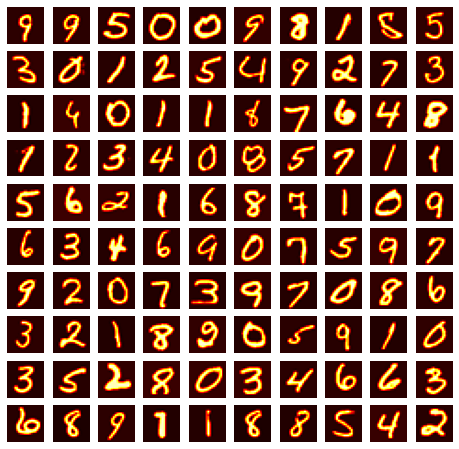

In [8]:
import matplotlib.image as mpimg
fig,axis=plt.subplots(10,10,figsize=(8,8))
for i in range(10):
  for j in range(10):
    axis[i,j].imshow(X[np.random.randint(0,5001),:].reshape(20,20,order="F"),cmap="hot")  #reshape back to 20 pixel by 20 pixel
    axis[i,j].axis("off")

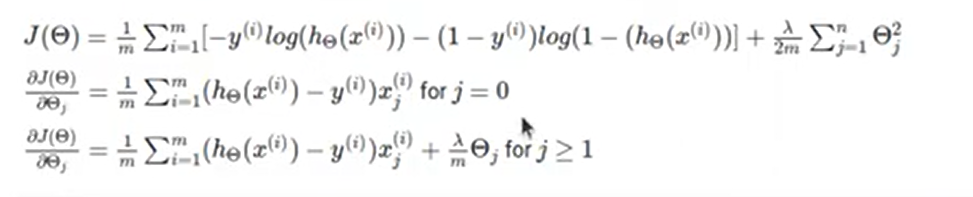

In [9]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [10]:
def lrCostFunction(theta,X,y,Lambda):
  m=len(y)
  z=np.dot(X,theta)
  h=sigmoid(z)
  l=(-y*np.log(h))-((1-y) * np.log(1-h))
  cost=np.sum(l)/m
  reg=(Lambda/(2*m)) * np.dot(theta[1:].transpose(),theta[1:])
  regCost=reg + cost

  j_0=(1/m) * (np.dot(X.transpose(),(h-y)))[0]
  j_1=(1/m) * (np.dot(X.transpose(),(h-y)))[1:] + (Lambda/m) * theta[1:]

  grad = np.vstack((j_0[:np.newaxis],j_1))

  return regCost[0], grad


In [11]:
theta_t=np.array([-2,-1,1,2]).reshape(4,1)
X_t=np.array([np.linspace(0.1,1.5,15)]).reshape(3,5).T
X_t=np.hstack((np.ones((5,1)), X_t))
y_t=np.array([1,0,1,0,1]).reshape(5,1)
J,grad=lrCostFunction(theta_t,X_t,y_t,3)
print("Cost:", J, "Expected Cost: 2.534819")
print("Gradients:\n",grad,"\nExpected gradients:\n 0.146561\n -0.548558\n 0.724722\n 1.398003")


Cost: [2.5348194] Expected Cost: 2.534819
Gradients:
 [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]] 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


In [12]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
  m=len(y)
  J_history=[]

  for i in range(num_iters):
    cost , grad=lrCostFunction(theta,X,y,Lambda)
    theta=theta - (alpha * grad)
    J_history.append(cost)
  
  return theta, J_history

In [13]:
def oneVsAll(X,y,num_labels, Lambda):
  m,n= X.shape[0], X.shape[1]
  intial_theta=np.zeros((n+1,1))
  all_theta=[]
  all_J=[]
  X=np.hstack((np.ones((m,1)),X))

  for i in range(1,num_labels+1):
    theta, J_history=gradientDescent(X,np.where(y==i,1,0), intial_theta,1,300,Lambda)
    all_theta.extend(theta)
    all_J.extend(J_history)
  
  return np.array(all_theta).reshape(num_labels,n+1),all_J

In [14]:
all_theta, all_J=oneVsAll(X,y, 10,0.1)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

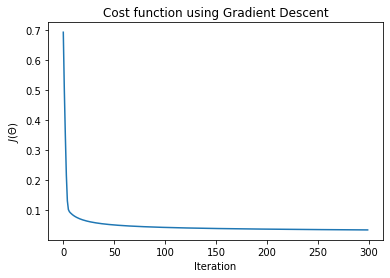

In [15]:
plt.plot(all_J[0:300])
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [16]:
all_theta.shape

(10, 401)

In [17]:
def predictOneVsAll(all_theta,X):
  m=X.shape[0]
  X=np.hstack((np.ones((m,1)),X)) # 5000 x 401
  predictions=X @ all_theta.T # 5000 x 10

  return np.argmax(predictions,axis=1)+1

In [18]:
pred=predictOneVsAll(all_theta,X)

In [19]:
pred.shape

(5000,)

In [20]:
pred=pred.reshape(5000,1)

In [21]:
np.sum(pred==y)/5000

0.9146

In [22]:
print("Training Set Accuracy:",sum(pred==y)[0]/5000*100,"%")

Training Set Accuracy: 91.46 %


Neural Network (3 layer)

In [23]:
mat2=loadmat("/content/ex3weights.mat")

Theta1=mat2["Theta1"]
Theta2=mat2["Theta2"]

In [24]:
Theta1.shape

(25, 401)

In [25]:
Theta2.shape

(10, 26)

In [26]:
def predict(Theta1,Theta2,X):
  m=X.shape[0]
  a1=np.hstack((np.ones((m,1)),X)) # 5000 x 401
  a2=sigmoid(a1 @ Theta1.T) # 5000 x 25
  a2=np.hstack((np.ones((m,1)),a2)) # 5000 x 26
  h=sigmoid(a2 @ Theta2.T) # 5000 x 10

  return np.argmax(h,axis=1)+1



In [27]:
pred2=predict(Theta1,Theta2,X)

In [28]:
pred2=pred2.reshape(5000,1)

In [29]:
print("Traing Set Accuracy", sum(pred2==y)[0]/5000*100,"%")

Traing Set Accuracy 97.52 %


In [30]:
sum(pred2==y)

array([4876])

Cost Function 

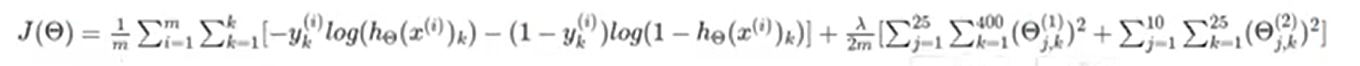

In [32]:
def sigmoidGradient(z):
  s=sigmoid(z)

  return s*(1-s)

In [33]:
X.shape

(5000, 400)

In [34]:
y.shape

(5000, 1)

input layer=400

hidden layer=25

num_labels=10

In [35]:
def nnCostFunction(nn_params,input_layer_size, hidden_layer_size, num_labels, X, y, Lambda):
  Theta1=nn_params[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size, input_layer_size+1) # 25 x 401
  Theta2=nn_params[((input_layer_size+1) * hidden_layer_size):].reshape(num_labels,hidden_layer_size) # 10 x 26

  m=X.shape[0]
  J=0

  a1=np.hstack((np.ones((m,1)),X)) # 5000x401

  y10=np.zeros((m,num_labels))  # 5000 x 10

  a2=sigmoid(a1 @ Theta1.T) # 5000x25
  a1=np.hstack((np.ones((m,1)),a2))  # 5000x26

  h=sigmoid(a2 @ Theta2.T)  # 5000x10

  for i in range(1,num_labels):
    y10[:,i-1][:,np.newaxis]=np.where(y==i,1,0)







In [37]:
ytest=np.zeros((5000,10))

In [38]:
for i in range(1,11):
  ytest[:,i-1][:,np.newaxis]=np.where(y==i,1,0)

In [39]:
ytest

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])